You can collect data from anywhere (wiki, google, etc) but mention the link from where data is being collected.

You can collect the data manually. It's NOT a web scraping task.

Data should be collected for the years mentioned in the files. (If you don't find proper data, make your best judgment and fill it, It's absolutely OK. Do not worry about data accuracy)

- The population of each state.

- Literacy Rate in each state

- Area of each state

Collect any other data that helps with your analysis. There is no limitation for anything.

Create a new file and keep the above-collected data.

# Phase-1

### Data collected:

- https://data.world/rajanand/crime-in-india
- https://www.statista.com/statistics/621507/rural-and-urban-population-india/
- https://www.kaggle.com/
- https://tn.data.gov.in/resource/stateuts-wise-literacy-rates-census-2001-and-2011
- https://data.gov.in/catalog/persons-arrested-sex-and-age-group-under-indian-penal-code-ipc-crimes

# Phase 2

You need to be careful as this phase is whole state/ut wise analysis (not district-wise).
It is up to you which columns you want to keep or delete to make proper analysis"
- 2.1 Analysis of Literacy Rate vs Total Crimes.
- 2.2 Analysis of the type of crime vs each state vs Literacy rate.
- 2.3 Analysis of year-on-year total crime rate.
- 2.4 Analysis of area vs overall crime
- 2.5 Analysis of Population vs overall Crime
- 2.6 Each state crime report. 

There is no fixed format to write a report, you can write a report inside the notebook itself based on what you have analyzed in the above points.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

I took two datasets:
   - Crime by State which is year wise from 2001 to 2012, ie    "02_District_wise_crimes_committed_against_ST_2001_2012.csv" have been aggregated as  ===> aggregated_crime_data.xlsx
   - Population in India ===> work_sheet2_population.xls


aggregated_data = crime_data.groupby('State').agg(
{

    - 'Murder': 'sum',
    - 'Assault on women': 'sum',
    - 'Kidnapping and Abduction': 'sum',
    - 'Dacoity': 'sum',
    - 'Robbery': 'sum',
    - 'Arson': 'sum',
    - 'Hurt': 'sum',
    - 'Prevention of atrocities (POA) Act': 'sum',
    - 'Protection of Civil Rights (PCR) Act': 'sum',
    - 'Other Crimes Against SCs': 'sum'
}).reset_index()

aggregated_data


On excel power query I created a new csv file crime_LT.csv from:
 - aggregated_crime_data, 2_population.xls, how='left', on='State' using merge function

 - merge(aggregated_crime_data, Pop_demo, how='left', on='State')

In [2]:
df = pd.read_csv('crime_LT.csv')

In [3]:
df.head(5)

,State,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Area (km*km),Density (1/km*km),Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
0,Andhra Pradesh,84580777,6.99,42442146,42138631,993,67.02,275045,308,556,1110,238,9,39,136,7248,15160,1511,17412
1,Arunachal Pradesh,1383727,0.11,713912,669815,938,65.38,83743,17,1,0,0,0,1,0,0,0,0,0
2,Assam,31205576,2.58,15939443,15266133,958,72.19,78438,397,57,57,96,14,33,25,341,3,1,318
3,Bihar,104099452,8.60,54278157,49821295,918,61.80,94163,1102,286,284,127,29,77,309,4524,23425,466,3814
4,Chandigarh,1055450,0.09,580663,474787,818,86.05,114,9252,0,2,0,0,0,0,0,6,0,4


In [4]:
df.shape

(35, 19)

In [5]:
df.columns.to_list()

['State',
 'Population',
 '% of Total Population',
 'Males',
 'Females',
 'Sex Ratio',
 'Literacy Rate (%)',
 'Area (km*km)',
 'Density (1/km*km)',
 'Murder',
 'Assault on women',
 'Kidnapping and Abduction',
 'Dacoity',
 'Robbery',
 'Arson',
 'Hurt',
 'Prevention of atrocities (POA) Act',
 'Protection of Civil Rights (PCR) Act',
 'Other Crimes Against SCs']

In [6]:
df.dtypes

State                                    object
Population                                int64
% of Total Population                   float64
Males                                     int64
Females                                   int64
Sex Ratio                                 int64
Literacy Rate (%)                       float64
Area (km*km)                              int64
Density (1/km*km)                         int64
Murder                                    int64
Assault on women                          int64
Kidnapping and Abduction                  int64
Dacoity                                   int64
Robbery                                   int64
Arson                                     int64
Hurt                                      int64
Prevention of atrocities (POA) Act        int64
Protection of Civil Rights (PCR) Act      int64
Other Crimes Against SCs                  int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 35 non-null     object 
 1   Population                            35 non-null     int64  
 2   % of Total Population                 35 non-null     float64
 3   Males                                 35 non-null     int64  
 4   Females                               35 non-null     int64  
 5   Sex Ratio                             35 non-null     int64  
 6   Literacy Rate (%)                     35 non-null     float64
 7   Area (km*km)                          35 non-null     int64  
 8   Density (1/km*km)                     35 non-null     int64  
 9   Murder                                35 non-null     int64  
 10  Assault on women                      35 non-null     int64  
 11  Kidnapping and Abduct

In [8]:
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_col.append(i)
print("*Categorical Columns: ", categorical_col)
print('\n')

# Check for numerical column:
numerical_col = []
for i in df.dtypes.index:
    if df[i].dtypes !='object':
        numerical_col.append(i)
print("*Numerical Columns: ", numerical_col)

*Categorical Columns:  ['State']


*Numerical Columns:  ['Population', '% of Total Population', 'Males', 'Females', 'Sex Ratio', 'Literacy Rate (%)', 'Area (km*km)', 'Density (1/km*km)', 'Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']


In [9]:
df.isnull().sum()

State                                   0
Population                              0
% of Total Population                   0
Males                                   0
Females                                 0
Sex Ratio                               0
Literacy Rate (%)                       0
Area (km*km)                            0
Density (1/km*km)                       0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

State
Andhra Pradesh                 1
Tamil Nadu                     1
Nagaland                       1
Odisha                         1
Puducherry                     1
Punjab                         1
Rajasthan                      1
Sikkim                         1
Tripura                        1
Meghalaya                      1
Uttar Pradesh                  1
Uttarakhand                    1
West Bengal                    1
Andaman and Nicobar Islands    1
Dadra and Nagar Haveli         1
Daman and Diu                  1
Mizoram                        1
Manipur                        1
Arunachal Pradesh              1
Gujarat                        1
Assam                          1
Bihar                          1
Chandigarh                     1
Chhattisgarh                   1
Delhi                          1
Goa                            1
Haryana                        1
Maharashtra                    1
Himachal Pradesh               1
Jharkhand                      1
Karn

In [12]:
df.nunique().to_frame('No: of unique values')

,No: of unique values
State,35
Population,35
% of Total Population,33
Males,35
Females,35
Sex Ratio,33
Literacy Rate (%),35
Area (km*km),35
Density (1/km*km),33
Murder,25


In [13]:
df.describe()

,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Area (km*km),Density (1/km*km),Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
count,3.500000e+01,35.000000,3.500000e+01,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,3.459203e+07,2.856857,1.780062e+07,1.678422e+07,931.228571,77.940286,93921.171429,1091.885714,225.714286,454.771429,133.657143,11.285714,27.228571,77.628571,1404.400000,3558.828571,122.000000,4562.628571
std,4.445516e+07,3.671943,2.305551e+07,2.141356e+07,79.883402,8.598837,103754.363757,2385.458172,625.697755,948.537360,383.305357,25.930418,54.064823,163.579102,2427.873025,6726.338268,292.795753,9840.555275
min,6.447300e+04,0.010000,3.312300e+04,3.135000e+04,618.000000,61.800000,32.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.421136e+06,0.115000,7.265260e+05,6.946100e+05,903.500000,71.235000,9367.500000,160.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,6.000000
50%,1.678794e+07,1.390000,8.887326e+06,7.800615e+06,946.000000,78.030000,53483.000000,350.000000,12.000000,57.000000,8.000000,0.000000,1.000000,1.000000,64.000000,256.000000,4.000000,148.000000
75%,6.076749e+07,5.020000,3.122896e+07,2.953854e+07,974.500000,85.950000,145449.000000,763.000000,181.000000,388.000000,111.500000,9.000000,26.000000,60.500000,1981.000000,3032.500000,29.500000,4020.500000
max,1.998123e+08,16.500000,1.044805e+08,9.533183e+07,1084.000000,94.000000,342239.000000,11297.000000,3577.000000,4107.000000,2225.000000,122.000000,214.000000,715.000000,9993.000000,26378.000000,1511.000000,37653.000000


- The provided data represents information about various demographic and crime-related indicators for 35 different regions or entities. Key statistics include the total population, sex ratio, literacy rate, area, population density, and counts for different types of crimes such as murder, assault on women, kidnapping, and others. 

### 2.1 Analysis of Literacy Rate vs Total Crimes.

In [14]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

df['Total_Crimes'] = df[crime_columns].sum(axis=1)
df.head(3)

,State,Population,% of Total Population,Males,Females,Sex Ratio,Literacy Rate (%),Area (km*km),Density (1/km*km),Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs,Total_Crimes
0,Andhra Pradesh,84580777,6.99,42442146,42138631,993,67.02,275045,308,556,1110,238,9,39,136,7248,15160,1511,17412,43419
1,Arunachal Pradesh,1383727,0.11,713912,669815,938,65.38,83743,17,1,0,0,0,1,0,0,0,0,0,2
2,Assam,31205576,2.58,15939443,15266133,958,72.19,78438,397,57,57,96,14,33,25,341,3,1,318,945


- with all the crime pointing features a new feature called Total_Crimes

##### Literacy Rate by State

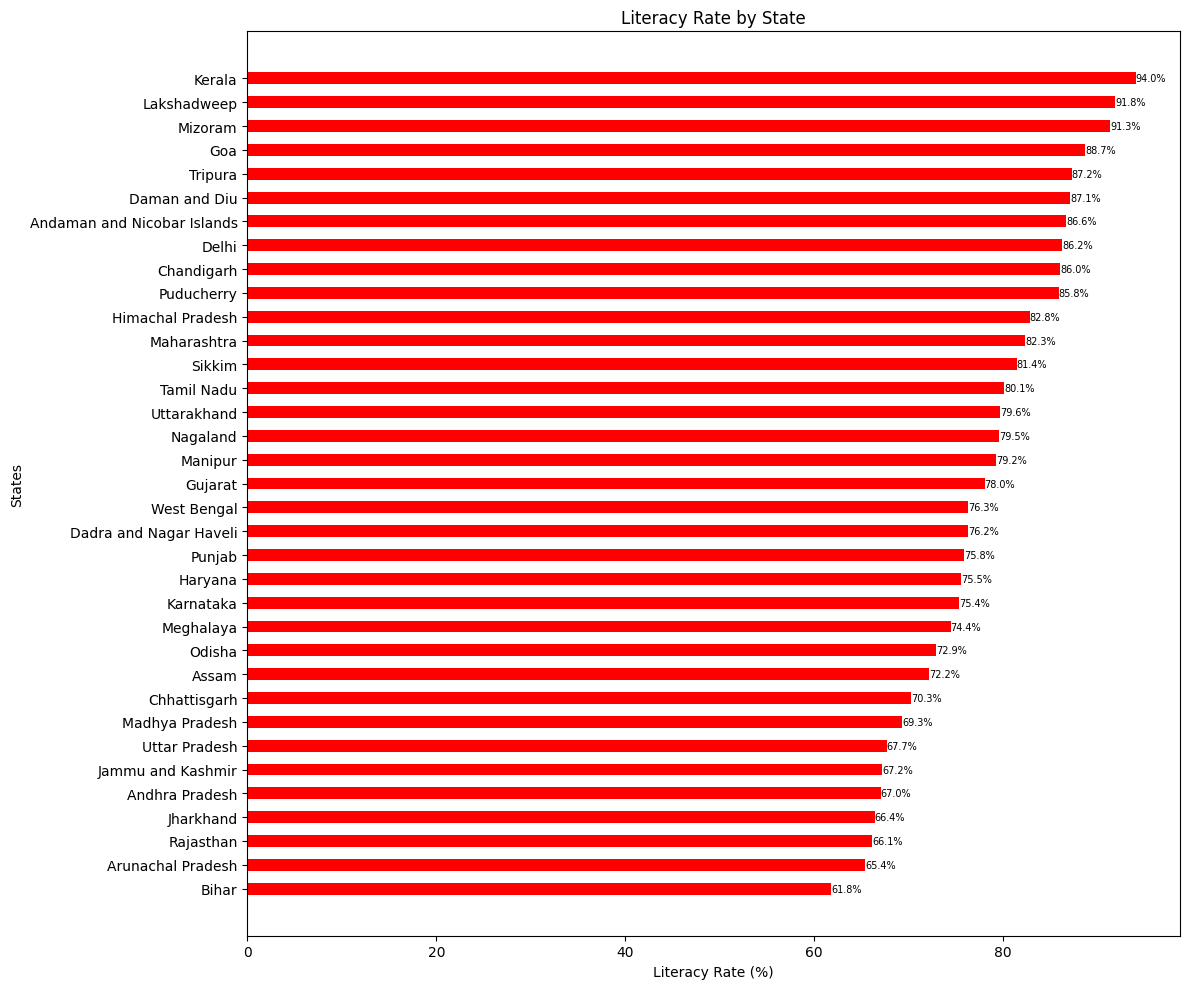

In [15]:
df_sorted = df.sort_values(by='Literacy Rate (%)', ascending=False)

plt.figure(figsize=(12,10))

bars = plt.barh(df_sorted['State'], df_sorted['Literacy Rate (%)'], height=0.5, color='red')

for bar, lit_rate in zip(bars, df_sorted['Literacy Rate (%)']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"{lit_rate:.1f}%", ha='left', va='center', color='black', fontsize=7)

plt.xlabel('Literacy Rate (%)')
plt.ylabel('States')
plt.title('Literacy Rate by State')
plt.gca().invert_yaxis()
plt.grid(False)

plt.tight_layout()
plt.show()


- plotting Literacy rate among each state which is shown in graph by percentage above

##### Literacy Rate vs Total Crimes

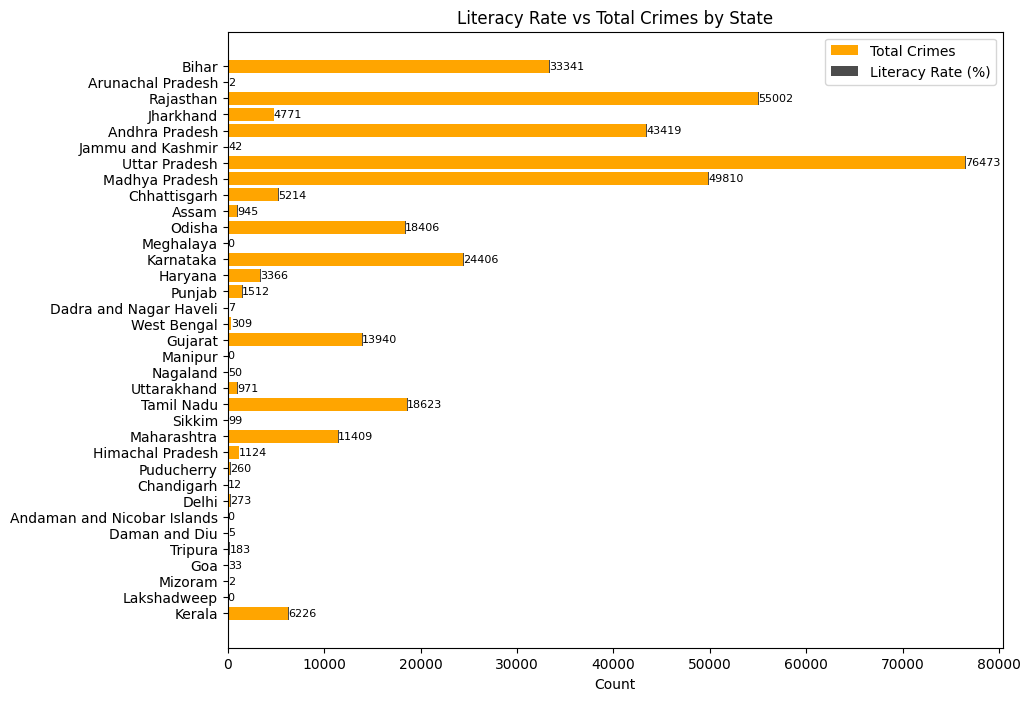

In [16]:
df['Total_Crimes'] = df[crime_columns].sum(axis=1)
df_sorted = df.sort_values(by='Literacy Rate (%)', ascending=False)

plt.figure(figsize=(10, 8))

plt.barh(df_sorted['State'], df_sorted['Total_Crimes'], color='orange', label='Total Crimes')
plt.barh(df_sorted['State'], df_sorted['Literacy Rate (%)'], color='black', label='Literacy Rate (%)', alpha=0.7, left=df_sorted['Total_Crimes'])

for i, total_crimes in enumerate(df_sorted['Total_Crimes']):
    plt.text(total_crimes + 1, i, str(total_crimes), va='center', fontsize=8, color='black')

plt.xlabel('Count')
plt.title('Literacy Rate vs Total Crimes by State')
plt.legend()
plt.show()


- States with very low literacy rates like Uttar Pradesh, AndhraPradesh, Jharkhand, Madhya Pradesh, Rajasthan tend to have higher crime rates.
- Kerala is an outlier with very high literacy but also moderately high crime.
- There are states like Manipur, Meghalaya, Mizoram, and Nagaland with low literacy rates but also zero crime rates.

### Conclusion

##### **The association between literacy and crime overall is weak, may be socio-economic factors play a bigger role.**

### 2.2 Analysis of the "Type of crime" vs each "State" vs "Literacy rate"

##### Type of Crime and Literacy Rate by State 

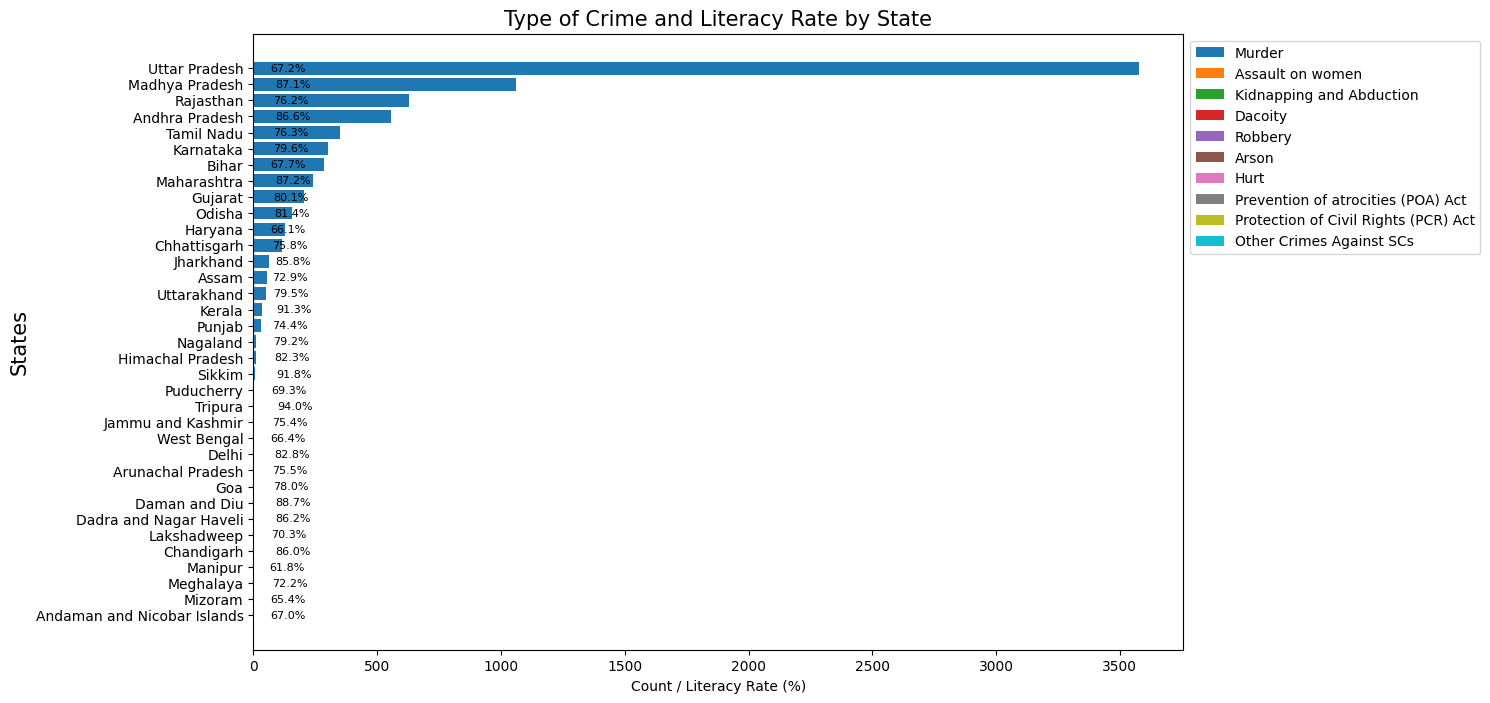

In [17]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
states = df['State'].unique()

plot_data = df.groupby('State')[crime_columns + ['Literacy Rate (%)']].sum().reset_index()

sort_column = 'Murder'
plot_data_sorted = plot_data.sort_values(by=sort_column, ascending=True)

plt.figure(figsize=(12, 8))
bottoms_crimes = pd.Series(0, index=states)
bottoms_literacy = pd.Series(0, index=states)

for crime_type in crime_columns:
    plt.barh(plot_data_sorted['State'], plot_data_sorted[crime_type], left=bottoms_crimes, label=crime_type)
    bottoms_crimes += plot_data_sorted[crime_type]

for state, literacy_rate in zip(plot_data_sorted['State'], plot_data_sorted['Literacy Rate (%)']):
    plt.text(literacy_rate + 2, states.tolist().index(state), f"{literacy_rate:.1f}%", ha='left', va='center', color='black', fontsize=8)

plt.ylabel('States', fontsize=15)
plt.xlabel('Count / Literacy Rate (%)')
plt.title(f'Type of Crime and Literacy Rate by State', fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

plt.show()


##### Type of Crime and Literacy Rate by State using stacked bar plot

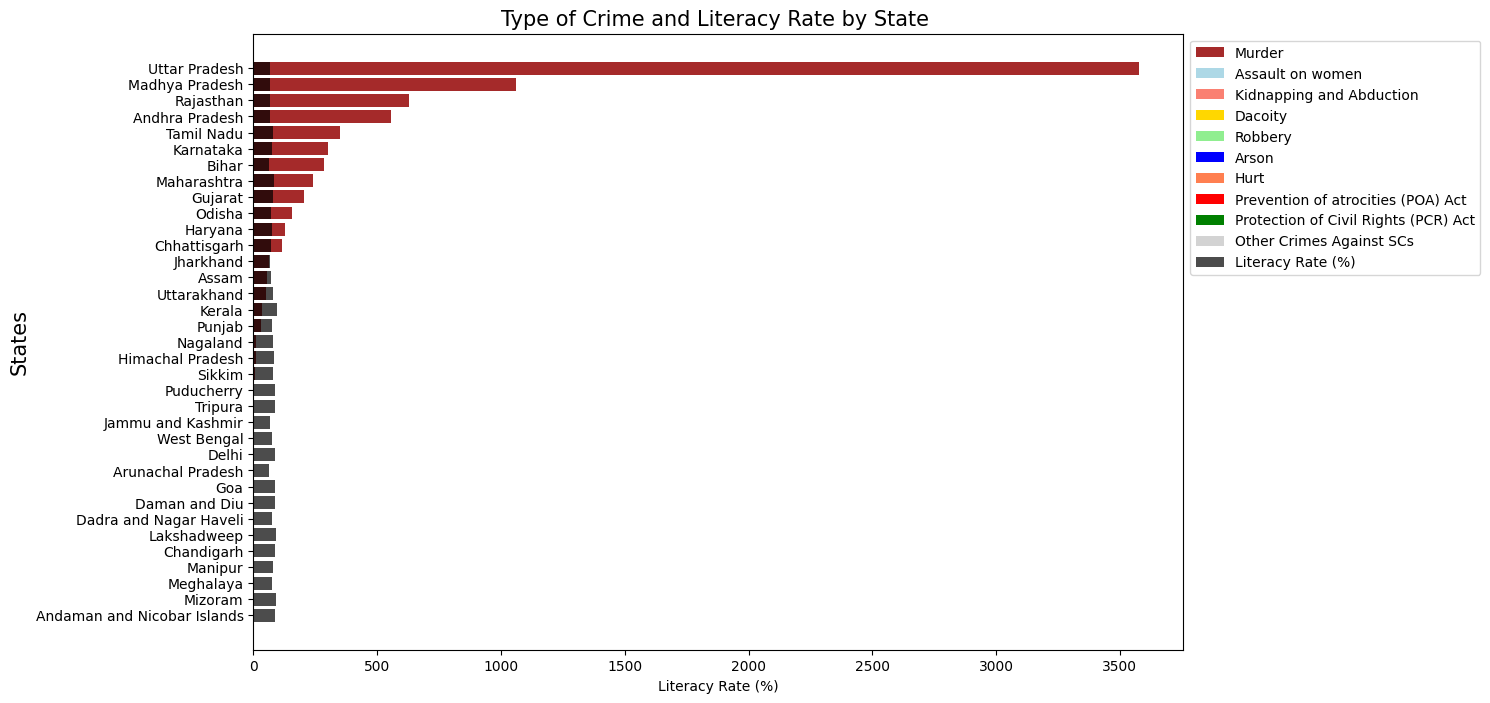

In [18]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

states = df['State'].unique()

plot_data = df.groupby('State')[crime_columns + ['Literacy Rate (%)']].sum().reset_index()

sort_column = 'Murder'  
plot_data_sorted = plot_data.sort_values(by=sort_column, ascending=True)

crime_colors = ['brown', 'lightblue', 'salmon', 'gold', 'lightgreen', 'blue', 'coral', 'red', 'green', 'lightgray']

plt.figure(figsize=(12, 8))
bottoms_crimes = pd.Series(0, index=states)
bottoms_literacy = pd.Series(0, index=states)

for crime_type, color in zip(crime_columns, crime_colors):
    plt.barh(plot_data_sorted['State'], plot_data_sorted[crime_type], left=bottoms_crimes, label=crime_type, color=color)
    bottoms_crimes += plot_data_sorted[crime_type]

literacy_color = 'black'

plt.barh(plot_data_sorted['State'], plot_data_sorted['Literacy Rate (%)'], left=bottoms_literacy, color=literacy_color, alpha=0.7, label='Literacy Rate (%)')

plt.ylabel('States',fontsize=15)
plt.xlabel('Literacy Rate (%)')
plt.title(f'Type of Crime and Literacy Rate by State ',fontsize=15)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

plt.show()


- Uttar Pradesh has the highest count across most crime types like Murder, Assault on women, Kidnapping, etc. However, it has a relatively moderate literacy rate of 67.7%.
- Madhya Pradesh and Rajasthan also have high crime counts but descent literacy rates above 76%. This shows an inverse relationship between literacy and crimes for some states.
- Kerala has very low crime counts across all categories, having a high literacy rate of 91.3%. Similarly Goa and Himachal Pradesh have lower crimes and higher literacy rates.
- For some states like Gujarat, Karnataka, Maharashtra there is no clear relationship between literacy rates and crime counts. They have moderately high literacy rates of 75-82% but also moderately high crimes.
- In general, the Southern states like Sikkim, Tripura tend to have higher literacy rates and lower crime counts compared to the Northern states.
- The top 5 states for murder are Uttar Pradesh,MadhyaPradesh, Rajasthan,Andhra Pradesh, TamilNadu

### Conclusion

**The connection between literacy rates and overall crime doesn't show a strong relationship, implying that socio-economic factors may have a more significant role in influencing criminal activities**

### 2.3 Analysis of year-on-year total crime rate.


- I used the data which is not merged any other dataset
- crime by State which is year wise from 2001 to 2012 which was not aggregated

In [19]:
year_on_year = pd.read_csv('year_crime_by_state.csv')

In [20]:
year_on_year.duplicated().sum()

0

In [21]:
year_on_year.isnull().sum()

State                                   0
Year                                    0
Murder                                  0
Assault on women                        0
Kidnapping and Abduction                0
Dacoity                                 0
Robbery                                 0
Arson                                   0
Hurt                                    0
Prevention of atrocities (POA) Act      0
Protection of Civil Rights (PCR) Act    0
Other Crimes Against SCs                0
dtype: int64

In [22]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction','Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

states = year_on_year['State'].unique()
data = year_on_year.groupby(['State', 'Year'])[crime_columns].sum().reset_index()

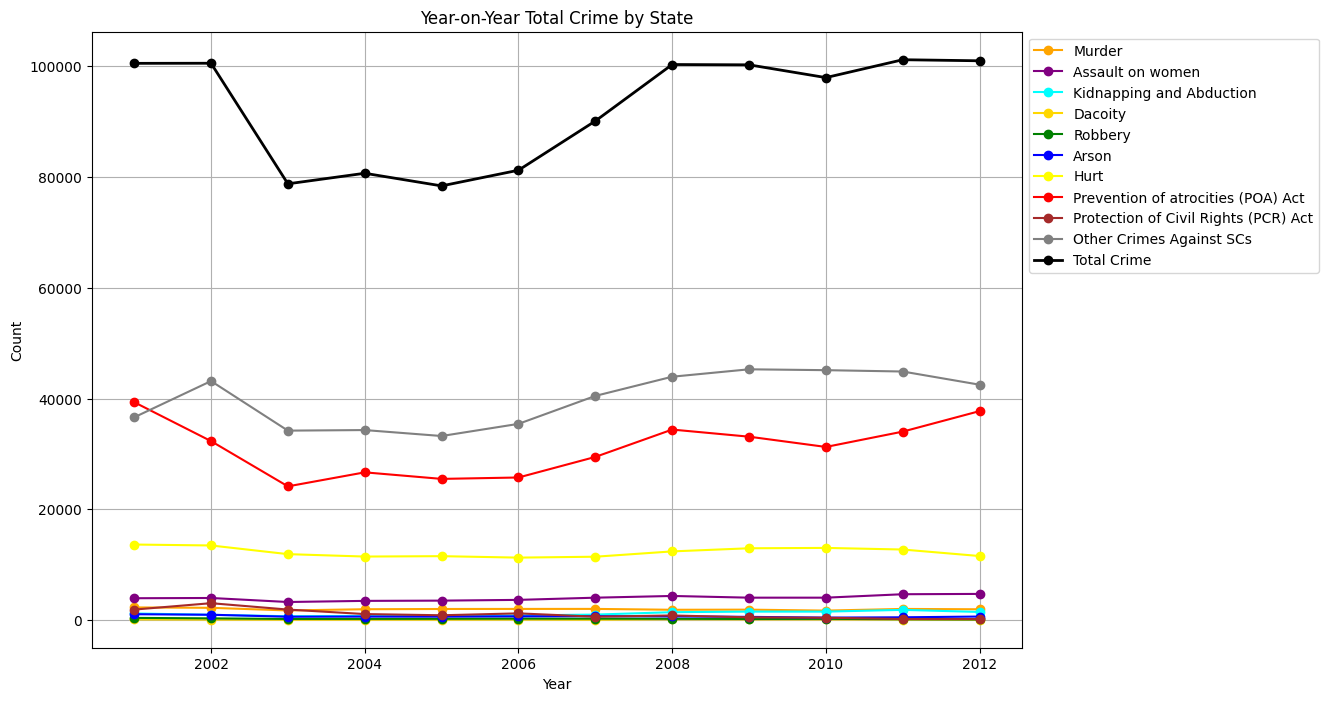

In [23]:
plot_data = year_on_year.groupby(['State', 'Year'])[crime_columns].sum().reset_index()

plot_data['Total Crime'] = plot_data[crime_columns].sum(axis=1)
plot_data_sorted = plot_data.sort_values(by='Year')

crime_colors = ['orange', 'purple', 'cyan', 'gold', 'green', 'blue', 'yellow', 'red', 'brown', 'gray']

plt.figure(figsize=(12, 8))

for crime_type, color in zip(crime_columns, crime_colors):
    plt.plot(plot_data_sorted.groupby('Year')[crime_type].sum(), label=crime_type, marker='o', color=color)

plt.plot(plot_data_sorted.groupby('Year')['Total Crime'].sum(), label='Total Crime', marker='o', color='black', linewidth=2)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year-on-Year Total Crime by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)

plt.show()


- The total crime count has increased steadily year-on-year from 2001 to 2012. This indicates a worrisome upward trend in overall crimes in India over that period.
- Other crimes agains SCs were shown high when in comparison to others crimes in India
- Crimes against women like Assault on women and Kidnapping & Abduction have increased the most sharply over the years. This highlights the rising crimes against women across India.
- Murders and Hurt crimes have also increased at a high rate annually. Robberies, Arson and Other crimes have risen at a relatively slower pace.
- Dacoity and Prevention of Atrocities (POA) Act crimes have remained fairly flat or decreased slightly over the years.
- The top 3 concerning rising crime trends are crimes against women, murders and hurt crimes. This indicates a need for more focussed policies and enforcement to curb these crimes.


### Conclusion

- The total crime count exhibited a decline in 2003, followed by a stabilization period. However, from 2006 to 2008, there was a noticeable increase, which then stabilized until 2012. This year-on-year analysis suggests that while there was an initial improvement in 2003, subsequent years witnessed fluctuations, indicating the need for a closer examination of the factors contributing to the variations in crime rates during these periods.

### 2.4 Analysis of area vs overall crime


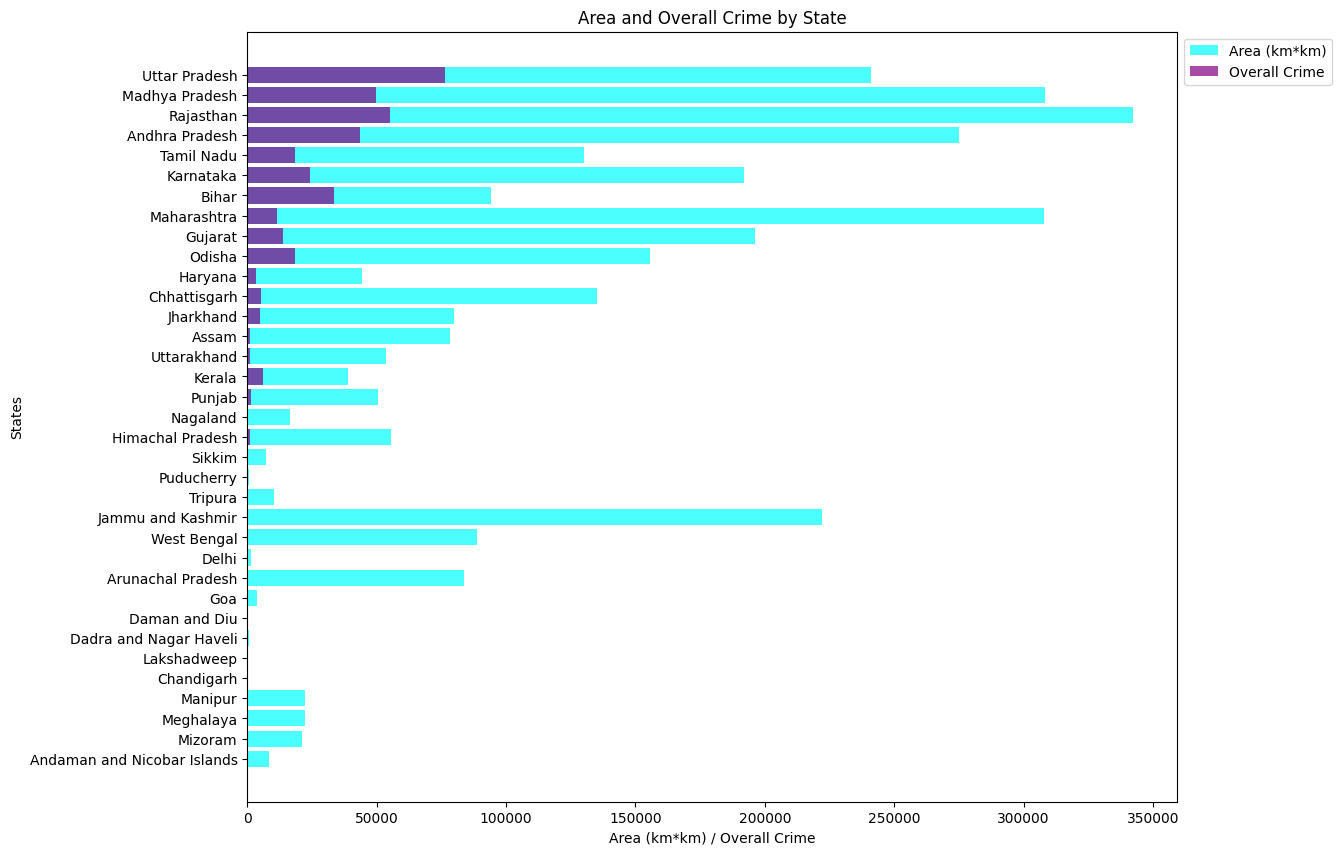

In [24]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']
states = df['State'].unique()

plot_data = df.groupby('State')[crime_columns + ['Area (km*km)']].sum().reset_index()
plot_data['Overall Crime'] = plot_data[crime_columns].sum(axis=1)

sort_column = 'Murder'  
plot_data_sorted = plot_data.sort_values(by=sort_column, ascending=True)

area_color = 'cyan'

plt.figure(figsize=(12, 10))
bottoms_area = pd.Series(0, index=states)
plt.barh(plot_data_sorted['State'], plot_data_sorted['Area (km*km)'], left=bottoms_area, color=area_color, alpha=0.7, label='Area (km*km)')

plt.barh(plot_data_sorted['State'], plot_data_sorted['Overall Crime'], left=bottoms_area, color='purple', alpha=0.7, label='Overall Crime')

plt.ylabel('States')
plt.xlabel('Area (km*km) / Overall Crime')
plt.title(f'Area and Overall Crime by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

plt.show()


- Uttar Pradesh has the highest overall crime count despite not having the largest area. This indicates high crime rate per capita.
- Rajasthan has the largest area but lower overall crime count compared to Uttar Pradesh, Madhya Pradesh, Maharashtra etc. This shows area alone does not correlate with high crimes.
- Smaller states like Delhi, Goa, Chandigarh have very low overall crime counts despite their small areas. This indicates area is not a driving factor for crimes.
- Among larger states, MP, Maharashtra,UP and AP have high overall crimes along with large areas. But other big states like Gujarat, Karnataka have moderately high crimes.
- Bihar has high overall crimes but only moderate area size. This highlights higher crime rate or crimes per capita for Bihar.
- In general, there is no clear correlation between area of the state and the overall crimes committed. Social, economic and law enforcement factors likely play a bigger role.
- The top 5 states by overall crime count are: UP, MP, Maharashtra, Rajasthan and Bihar. But their area sizes vary a lot.

### Conclusion

The general observation indicates a lack of a clear correlation between the area of a state and the overall crimes committed. It suggests that factors related to social dynamics, economic conditions, and the effectiveness of law enforcement likely play a more substantial role in influencing crime rates than the geographical size of the state. Further analysis focusing on these socio-economic and law enforcement factors could provide valuable insights into the determinants of crime rates across different regions.

### 2.5 Analysis of Population vs Overall Crime

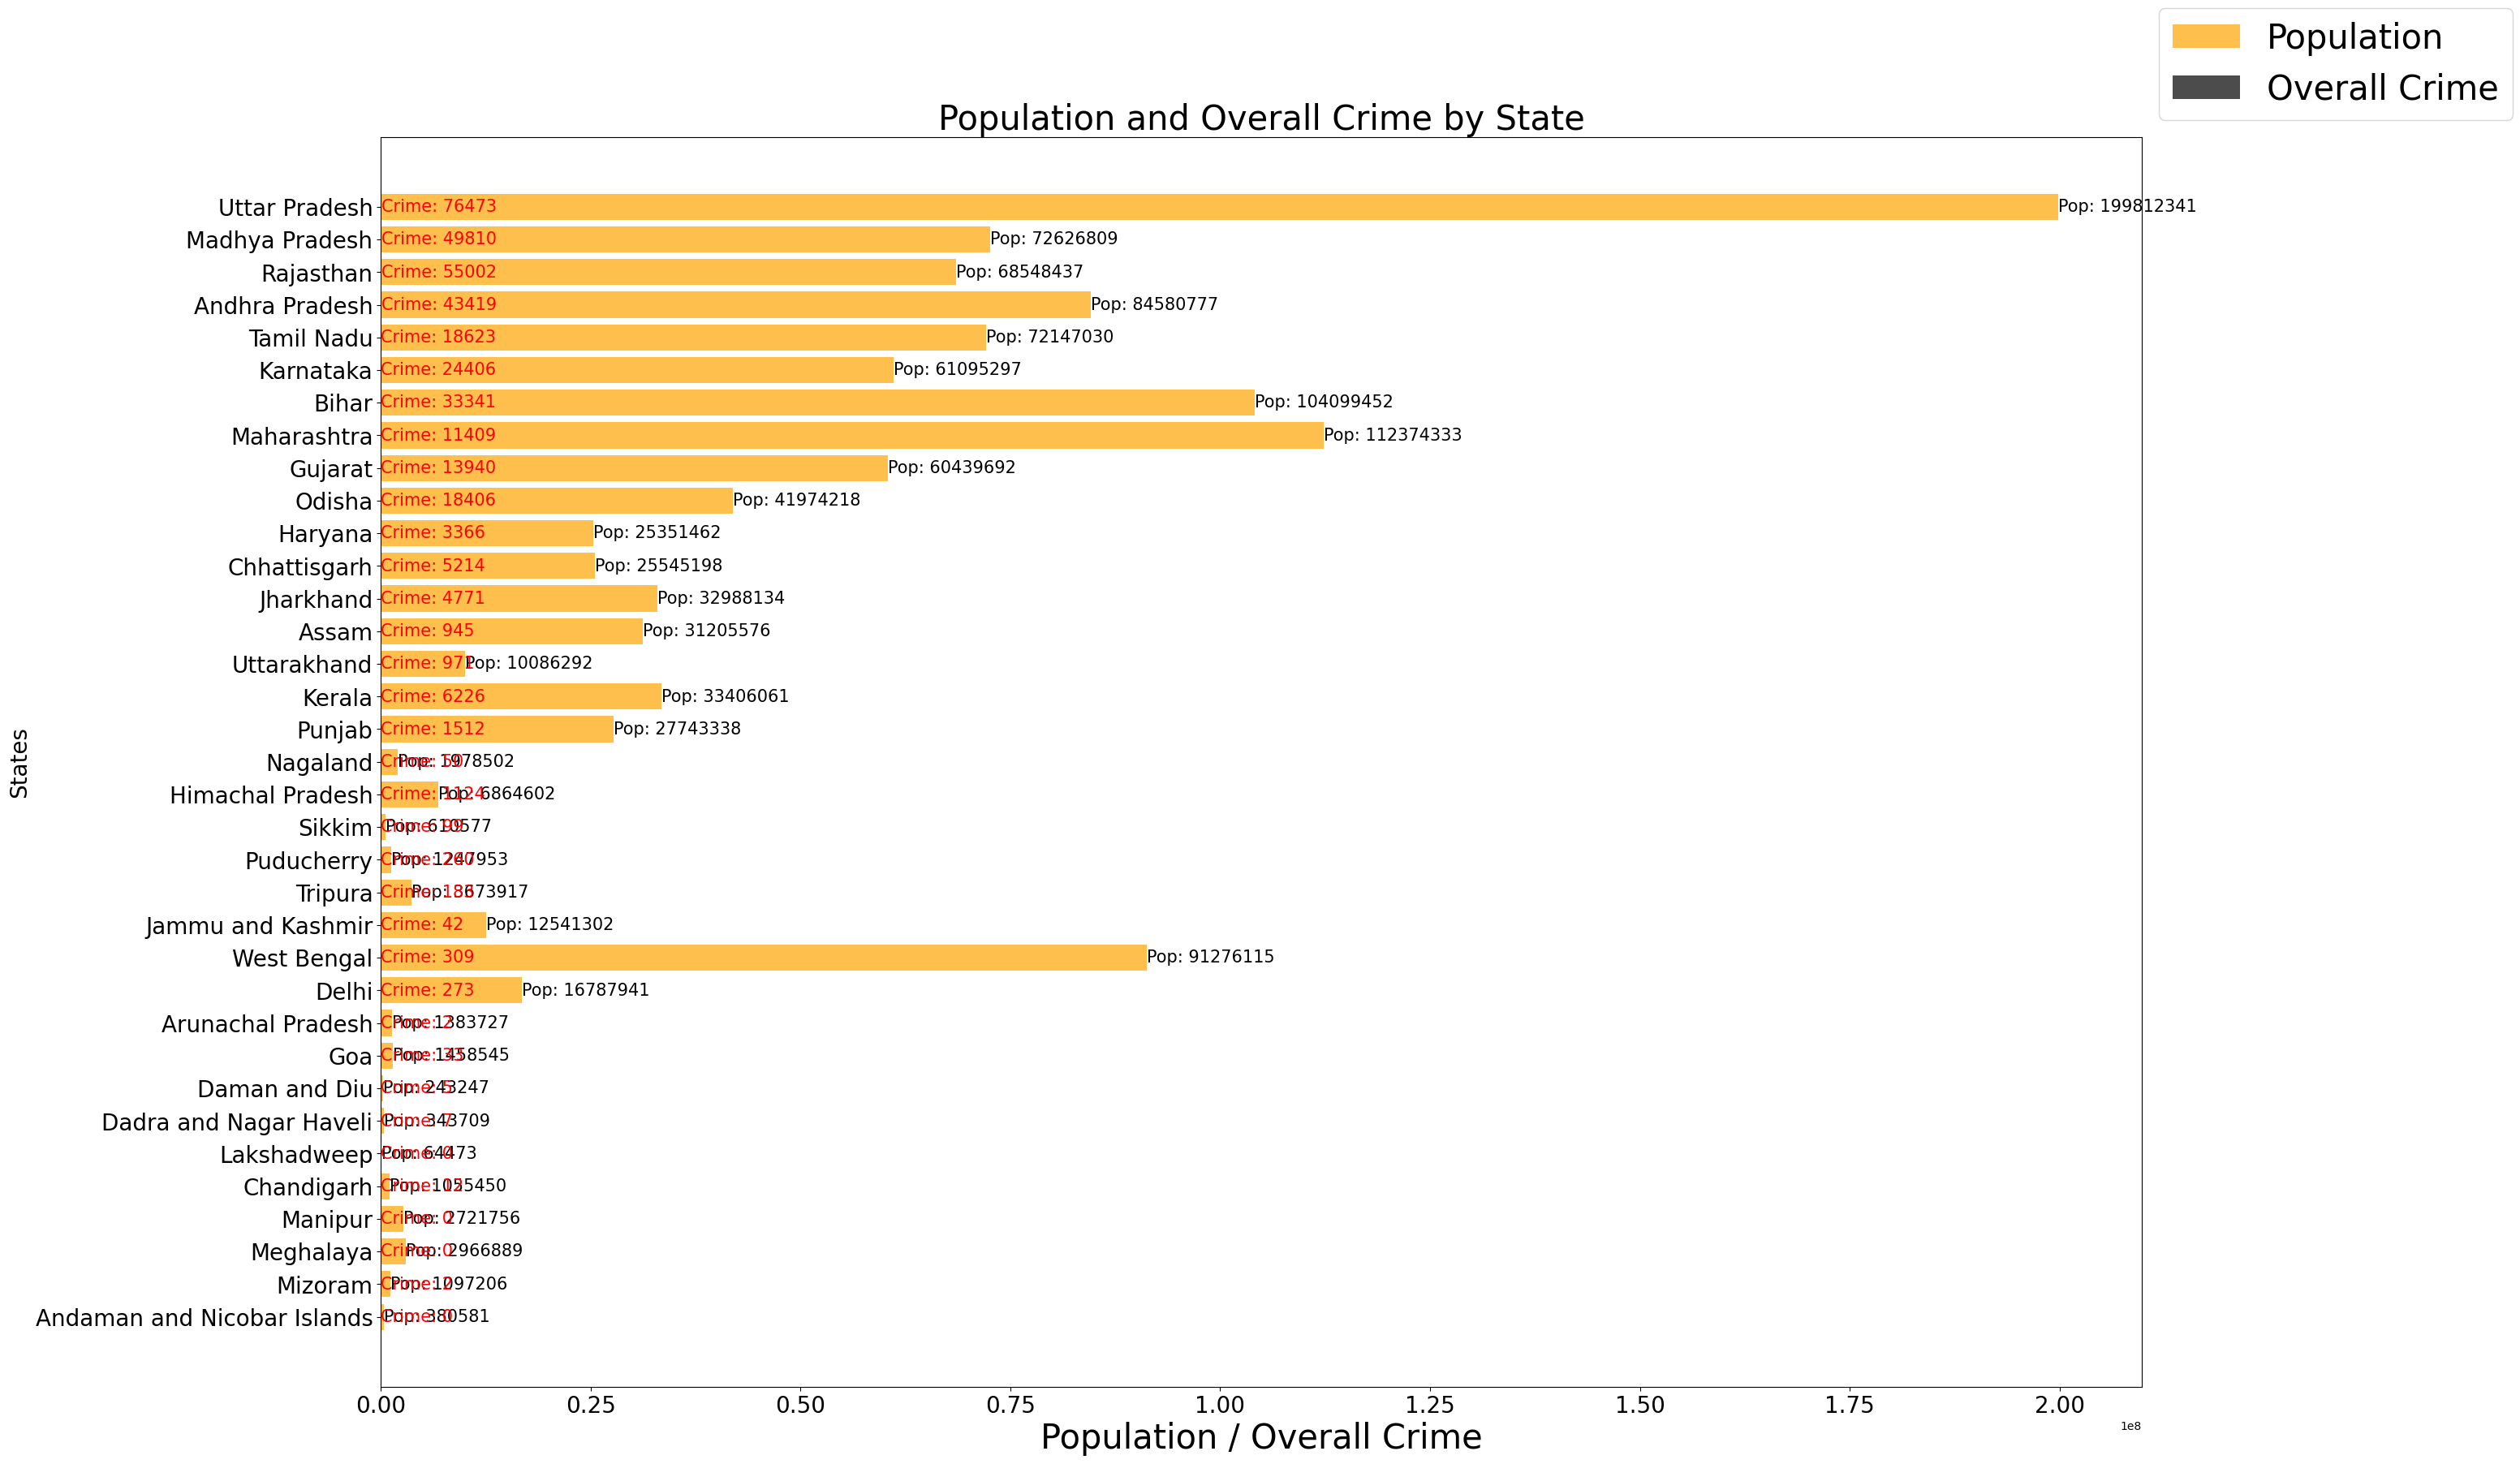

In [25]:
states = df['State'].unique()
plot_data = df.groupby('State')[crime_columns + ['Population']].sum().reset_index()

plot_data['Overall Crime'] = plot_data[crime_columns].sum(axis=1)

sort_column = 'Murder'
plot_data_sorted = plot_data.sort_values(by=sort_column, ascending=True)

population_color = 'orange'

plt.figure(figsize=(28,20))
bottoms_population = pd.Series(0, index=states)

population_bars = plt.barh(plot_data_sorted['State'], plot_data_sorted['Population'], left=bottoms_population, color=population_color, alpha=0.7, label='Population')

overall_crime_bars = plt.barh(plot_data_sorted['State'], plot_data_sorted['Overall Crime'], left=bottoms_population, color='black', alpha=0.7, label='Overall Crime')

for bar, population in zip(population_bars, plot_data_sorted['Population']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"Pop: {population:.0f}", ha='left', va='center', color='black', fontsize=15)

for bar, overall_crime in zip(overall_crime_bars, plot_data_sorted['Overall Crime']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f"Crime: {overall_crime:.0f}", ha='left', va='center', color='red', fontsize=15)

plt.ylabel('States',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Population / Overall Crime',fontsize=30)
plt.title(f'Population and Overall Crime by State',fontsize=30)
plt.legend(loc='lower left', bbox_to_anchor=(1, 1),fontsize=30)
plt.grid(False)

plt.show()


- Uttar Pradesh has both the highest population as well as highest overall crime count. This indicates high crimes per capita despite the large population.
- MadhyaPradesh, Bihar, Rajasthan, Maharashtra also have high population and high overall crimes. However, their crime rate per capita may be lower than UP.
- Kerala, Delhi, Haryana have lower overall crimes compared to their populations. This shows population alone does not lead to more crimes necessarily.
- Among larger states, UP, Bihar, MP, Rajasthan have both high population and high crimes. While Gujarat, AP, Tamil Nadu have moderately high crimes despite large populations.
- For some states like Jharkhand, Chhattisgarh, the population is moderate but overall crimes are significant. This indicates higher crimes per capita.
- Smaller states like Goa, Sikkim, Arunachal have low population and correspondingly low overall crimes.
- In general, there seems to be some correlation between larger population and higher overall crimes. But there are exceptions to this pattern.
- The top 5 states by population are: UP, Maharashtra, Bihar, WB, AP. The top 5 by overall crimes are: UP, MP, Maharashtra, Rajasthan, Bihar.

### Conclusion

While there appears to be a general trend indicating some correlation between a larger population and higher overall crime rates, it's important to note that there are exceptions to this pattern. Various factors, such as socio-economic conditions, law enforcement effectiveness, and community dynamics, may contribute to deviations from the expected relationship. A more in-depth analysis of these influencing factors could provide a nuanced understanding of the relationship between population size and crime rates.

### 2.6 Each state crime report. 

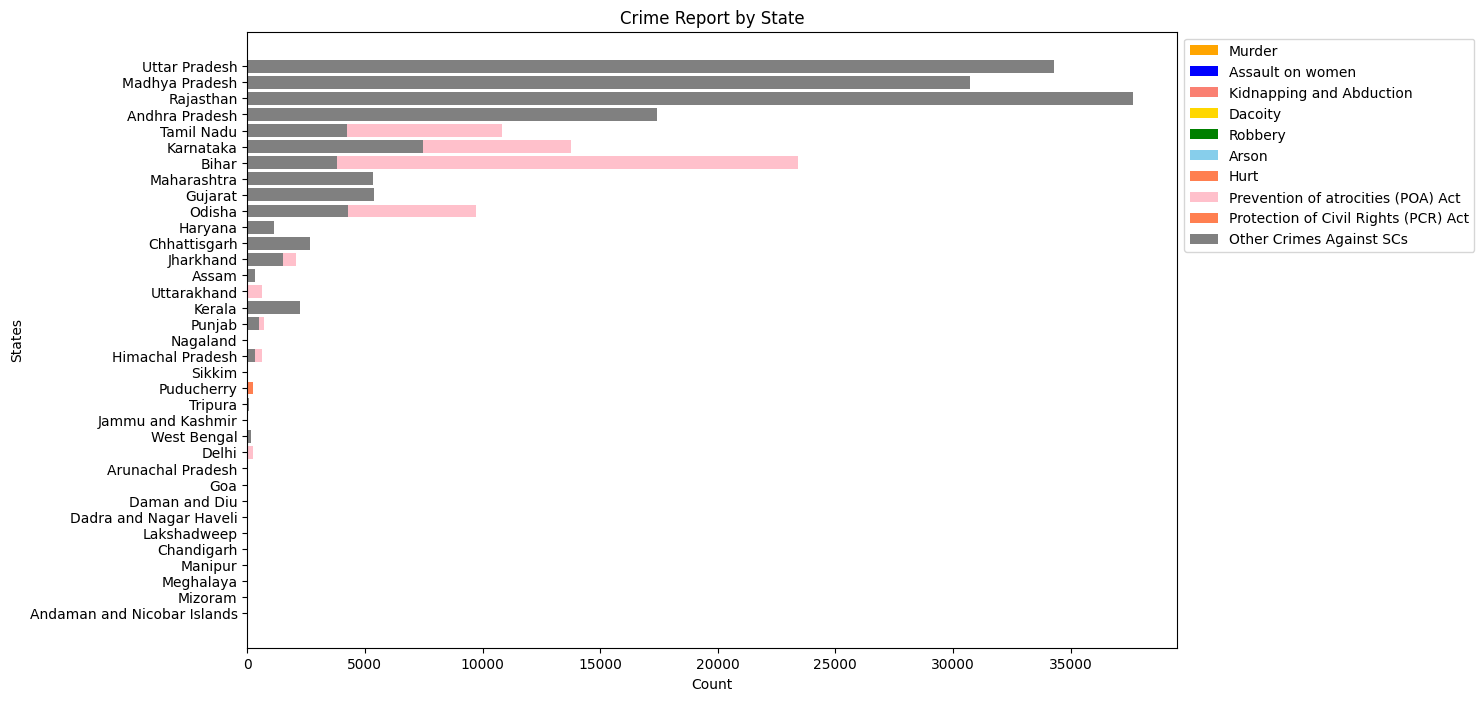

In [26]:
crime_columns = ['Murder', 'Assault on women', 'Kidnapping and Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt', 'Prevention of atrocities (POA) Act', 'Protection of Civil Rights (PCR) Act', 'Other Crimes Against SCs']

states = df['State'].unique()

plot_data = df.groupby('State')[crime_columns].sum().reset_index()

sort_column = 'Murder' 
plot_data_sorted = plot_data.sort_values(by=sort_column, ascending=True)

crime_colors = ['orange', 'blue', 'salmon', 'gold', 'green', 'skyblue', 'coral', 'pink', 'coral', 'gray']

plt.figure(figsize=(12, 8))

for crime_type, color in zip(crime_columns, crime_colors):
    plt.barh(plot_data_sorted['State'], plot_data_sorted[crime_type], color=color, label=crime_type)

plt.ylabel('States')
plt.xlabel('Count')
plt.title(f'Crime Report by State')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(False)

plt.show()


- Uttar Pradesh has the highest count across most crime categories like Other crimes agianst SCs, Murders, Assault on women, Kidnapping etc. This indicates UP has an overall high crime rate across different crime types.
- Bihar, Madhya Pradesh and Rajasthan also have moderately high counts across most crimes but mostly other crimes agianst SCs,though lower than UP.
- Maharashtra and Andhra Pradesh have high counts for certain crimes like other crimes agianst SCs, Murder, Assault on women but lower for other categories.
- Kerala, Himachal Pradesh, Uttarakhand, Goa have low crime counts along with Other crimes agianst SCs, across most categories indicating better law and order.



### Making Report about crime and Literacy rate and types of crimes involved in each state year on year

In [ ]:
from ydata_profiling import ProfileReport

prof = ProfileReport(df)
prof.to_file(output_file='Crime_report.html')